In [1]:
!pip install pythainlp
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy

In [2]:
!pip uninstall numpy

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    unin

In [1]:
!pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.2 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.22.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.wkbCNUHQXc/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.sTtbEde44y/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.QslFG2G7hz/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu

In [4]:
!apt-get update
!apt-get upgrade
!apt-get install -y unzip xvfb libxi6 libgconf-2-4
!pip install pyvirtualdisplay
!pip install xvfbwrapper

# Download and install the compatible version of ChromeDriver
!wget https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_linux64.zip
#!wget https://chromedriver.storage.googleapis.com/116.0.5845.36/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!chmod +x chromedriver
!mv chromedriver /usr/local/bin

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://deb.debian.org/debian-security buster/updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [5]:
#loading data

df = pd.read_csv('Review PaBoon Restuarant.csv')

In [6]:

df.head()

,Review_ID,Review
0,1,เห็นตอนเย็นรถเข้าออกเยอะมาก เลยไม่ได้แวะสักที ...
1,2,ร้านอาหารสไตล์ครอบครัว พื้นที่สวย มีปลาเยอะมาก...
2,3,ร้านนี้เป็นร้านแนะนำในกลุ่มพาเด็กเที่ยวเลยค่ะ ...
3,4,เป็นร้านอาหารขนาดใหญ่ บรรยากาศเป็นธรรมชาติ ตั้...
4,5,ครัวป้าบุญ สาขา3 ร้านประจำ หลังเลิกงาน ตอนนี้ ...


In [7]:
!pip install --upgrade pip
!pip install --upgrade gensim
!pip install --upgrade pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/e8/d9/104988573fd2c1acdc64e66883b35fb8ae559310d2d9f77db78bf7de9add/gensim-4.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.22.0 which is incompatible.


  Obtaining dependency information for numpy>=1.24.2 from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [8]:
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ','  ','\n','(',')','ร้าน','ค่ะ','คะ','ๆ','มี','และ','รร.','ลูกค้า','ๆๆ','ค่','-','จอม','ทอง','กาแฟ','นั่ง','ดี','เยอะ','ร้านอาหาร']
screening_words = stopwords + removed_words

existing_words = set(thai_words())

words = {'ราคาถูก','ราคาแพง','คุ้มค่า','สงบ','สไสตส์','มากกก','ไม่มี','รถส่วนตัว','แหล่งท่องเที่ยว','สะพานบุญ','ไม่ได้','อีกรอบ','เหใาะสม','อพำนวย','สงบดี','ราคาที่','น่านั่ง'}
custom_dict = existing_words.union(words)

custom_dictionary_trie = Trie(custom_dict)

def tokenize_with_comma(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine = 'newmm',custom_dict = custom_dictionary_trie)
  print(words)
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]


In [11]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_comma(x))
df.head()

['เห็น', 'ตอนเย็น', 'รถ', 'เข้าออก', 'เยอะ', 'มาก', ' ', 'เลย', 'ไม่ได้', 'แวะ', 'สักที', ' ', 'เพราะ', 'คิด', 'ว่า', 'คน', 'เยอะ', 'น่าจะ', 'บริการ', 'ไม่', 'ดี', ' ', 'แต่', 'กลับกัน', 'เลย', ' ', 'พน', 'ง.', 'เอาใจใส่', 'ดี', ' ', 'และ', 'เสิร์ฟ', 'ค่อนข้าง', 'เร็ว', 'เลย', '\n', 'ร้าน', 'กว้าง', 'มาก', ' ', 'มี', 'โซน', 'คาเฟ่', ' ', 'ห้อง', 'แอร์', ' ', 'โซน', 'ซุ้ม', ' ', 'ห้อง', 'คาราโอเกะ', ' ', 'เหมาะกับ', 'งานเลี้ยง', 'สังสรรค์', 'มาก', 'เว่อร์', ' ', 'มี', 'บ่อ', 'ปลา', ' ', 'มี', 'กระต่าย', ' ', 'และ', 'สัตว์', 'อื่นๆ', ' ', 'ให้', 'เด็ก', 'ๆ', 'ดู', 'ด้วย', ' ', 'สนามเด็กเล่น', 'ก็', 'มี', '\n', 'เมนู', 'อาหาร', 'เหมือน', 'จะ', 'ราคาแพง', ' ', 'แต่', 'ไม่เลย', ' ', 'เพราะ', 'Portion', ' ', 'คือ', 'พอ', 'กินกัน', 'หลาย', 'คน', 'อิ่ม', 'เลย', 'ล่ะ', '\n', 'แต่', 'เมนู', 'เครื่องดื่ม', 'ราคา', 'ดุ', 'จริง', '\n', 'อาหาร', 'รสชาติ', 'ดี', ' ', 'ราคา', 'สม', 'เหตุผล', ' ', 'ข้อเสีย', 'คือ', 'ไม่', 'ควร', 'มา', 'คนเดียว', ' ', 'เพราะ', 'อาหาร', 'แต่', 'อย่าง', 'ค่อนข้าง', 'เยอะ'

,Review_ID,Review,Review_tokenized
0,1,เห็นตอนเย็นรถเข้าออกเยอะมาก เลยไม่ได้แวะสักที ...,"ตอนเย็น,รถ,เข้าออก,ไม่ได้,แวะ,สักที,คน,บริการ,..."
1,2,ร้านอาหารสไตล์ครอบครัว พื้นที่สวย มีปลาเยอะมาก...,"สไตล์,ครอบครัว,พื้นที่,สวย,ปลา,เด็ก,ชอบ,ของเล่..."
2,3,ร้านนี้เป็นร้านแนะนำในกลุ่มพาเด็กเที่ยวเลยค่ะ ...,"แนะนำ,เด็ก,เที่ยว,ตอบ,โจทย์,ความสุข,เด็ก,ให้อา..."
3,4,เป็นร้านอาหารขนาดใหญ่ บรรยากาศเป็นธรรมชาติ ตั้...,"ขนาดใหญ่,บรรยากาศ,เป็นธรรมชาติ,ตั้งอยู่,แหล่ง,..."
4,5,ครัวป้าบุญ สาขา3 ร้านประจำ หลังเลิกงาน ตอนนี้ ...,"ครัว,ป้า,บุญ,สาขา,3,ประจำ,เลิกงาน,ตอนนี้,โควิด..."


In [12]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id.keys())

dict_keys(['Portion', 'กระต่าย', 'กลับกัน', 'กิน', 'กินกัน', 'ขอให้', 'ข้อเสีย', 'คน', 'คนเดียว', 'คาราโอเกะ', 'คาเฟ่', 'ง.', 'งานเลี้ยง', 'ซุ้ม', 'ดุ', 'ดู', 'ตอนเย็น', 'ทำ', 'บริการ', 'บ่อ', 'ปกติ', 'ปล.', 'ปลา', 'พน', 'รถ', 'รสชาติ', 'ราคา', 'ราคาแพง', 'ล่ะ', 'สนามเด็กเล่น', 'สม', 'สักที', 'สังสรรค์', 'สัตว์', 'ห้อง', 'อาหาร', 'อิ่ม', 'เข้าออก', 'เครื่องดื่ม', 'เจอ', 'เด็ก', 'เมนู', 'เว่อร์', 'เสิร์ฟ', 'เหมาะกับ', 'เหมือน', 'เอาใจใส่', 'แบบสอบถาม', 'แวะ', 'แอร์', 'โซน', 'ไม่เลย', 'ไม่ได้', 'ของเล่น', 'ครอบครัว', 'จัดจ้าน', 'ชอบ', 'ซี', 'ถึงใจ', 'น้ำจิ้ม', 'ผู้ใหญ่', 'พื้นที่', 'พูดถึง', 'ฟู้ด', 'วัตถุดิบ', 'สด', 'สวย', 'สไตล์', 'เด็ด', 'เต็ม', 'ไม่ต้อง', 'กลิ่น', 'กินข้าว', 'ขาดเหลือ', 'ความสะอาด', 'ความสุข', 'คอก', 'คอย', 'คาร์', 'จาน', 'ชั้นบน', 'ดูแล', 'ด้านล่าง', 'ด้านหน้า', 'ตอบ', 'ตัว', 'ตัวเล็ก', 'ถาม', 'ที่นั่ง', 'นะคะ', 'บริเวณ', 'ประจำ', 'ประทับใจ', 'ปล่อย', 'ฟ', 'รบกวน', 'รองรับ', 'รับลม', 'สนาม', 'สมราคา', 'สั่ง', 'หลากหลาย', 'อาศัย', 'อิสระ', 'เขียว', 'เค้า', 'เที่ยว', 

In [13]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

In [33]:
num_topics = 100
chunksize = 4000
passes = 20
iterations = 50
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

#%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', it

In [34]:
from gensim import models

n_topics = 3
model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations,passes=passes,eval_every=eval_every)
#model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics

In [35]:

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.034302 -0.071076       1        1  51.652580
2     -0.081511  0.007127       2        1  35.545486
1      0.047209  0.063949       3        1  12.801934, topic_info=        Term       Freq      Total Category  logprob  loglift
125     สาขา  13.000000  13.000000  Default  30.0000  30.0000
215       ยำ   6.000000   6.000000  Default  29.0000  29.0000
195     โต๊ะ  20.000000  20.000000  Default  28.0000  28.0000
144       ปู  10.000000  10.000000  Default  27.0000  27.0000
450     เล่น   5.000000   5.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
154      สวน   1.144855   8.509076   Topic3  -5.2639   0.0497
205  ถ่ายรูป   1.145009   8.611523   Topic3  -5.2637   0.0379
33     สัตว์   1.145629  11.515437   Topic3  -5.2632  -0.2522
144       ปู   1.145511  10.414754   Topic3  -5.2633  -0.1518
7         คน   1.145480  13.905692   Topic3  -5.2633  -0.4409

[217 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
513       1  0.598419        
513       2  0.359051        
366       3  0.932864       1
367       3  0.932850       2
131       1  0.539002       3
...     ...       ...     ...
52        1  0.427483  ไม่ได้
52        2  0.284989  ไม่ได้
52        3  0.142494  ไม่ได้
410       3  0.860499     ไส้
411       3  0.604946  ไส้ตัน

[264 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [36]:
model.show_topic(0)

[('อาหาร', 0.016364587),
 ('ห้อง', 0.01242279),
 ('อร่อย', 0.011010256),
 ('ปลา', 0.010765611),
 ('รสชาติ', 0.010199665),
 ('ปู', 0.01008869),
 ('เมนู', 0.0099938875),
 ('โต๊ะ', 0.009220828),
 ('บริการ', 0.008329965),
 ('คน', 0.008329539)]

In [37]:
model.show_topic(1)

[('สาขา', 0.02736181),
 ('อาหาร', 0.011832573),
 ('เด็ก', 0.009611781),
 ('โซน', 0.009610754),
 ('1', 0.007395185),
 ('สนามเด็กเล่น', 0.0073950784),
 ('2', 0.007394928),
 ('เปรี้ยว', 0.0073947418),
 ('กุ้ง', 0.007394074),
 ('เล่น', 0.007393885)]

In [38]:
model.show_topic(2)

[('อาหาร', 0.027583376),
 ('โต๊ะ', 0.01931012),
 ('อร่อย', 0.014580667),
 ('ห้อง', 0.013887927),
 ('รสชาติ', 0.013285418),
 ('บรรยากาศ', 0.011606802),
 ('เด็ก', 0.01103537),
 ('กระต่าย', 0.010772828),
 ('ชอบ', 0.010428338),
 ('แนะนำ', 0.008671419)]

In [39]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [40]:
df.tail()

,Review_ID,Review,Review_tokenized,topics,score
25,26,ร้านครัวป้าบุญ สาขา 3 ร้านใหญ่มาก\nเดินทางมาไม...,"ครัว,ป้า,บุญ,สาขา,3,เดินทาง,J-park,ศรีราชา,ที่...",0,0.997988
26,27,ร้านป้าบุญ สาขา3 จะอยู่เยื้องๆกับ j-park มาทุก...,"ป้า,บุญ,สาขา,3,เยื้อง,j-park,ผิดหวัง,ครอบครัว,...",0,0.998929
27,28,ขับรถผ่านเส้นสวนเสือศรีราชา สะดุดตากับร้านนี้ร...,"ขับรถ,เส้น,สวน,เสือ,ศรีราชา,สะดุดตา,บรรยากาศ,โ...",1,0.997161
28,29,ของเล่นเยอะสวยมากกว้างขวางเด็กๆชอบ พามากินข้าว...,"ของเล่น,สวย,เด็ก,ชอบ,กินข้าว,ร้อง,เกะ,เหมือน,ส...",2,0.997441
29,30,อาหารอร่อยและมีคุณภาพ มีเมนูหลากหลายให้เลือกใน...,"อาหาร,อร่อย,คุณภาพ,เมนู,หลากหลาย,เลือก,เรท,ราค...",0,0.998657


#WordCloud

In [41]:
from wordcloud import WordCloud
!wget https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf

--2023-08-29 12:24:23--  https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Thaniparn/MADT8101-Customer-Analytics/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf [following]
--2023-08-29 12:24:23--  https://raw.githubusercontent.com/Thaniparn/MADT8101-Customer-Analytics/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

In [42]:
from PIL import ImageFont

font_path = "TH Sarabun New Regular.ttf"
try:
    font = ImageFont.truetype(font_path, size=12)
except Exception as e:
    print("Font loading error:", e)

In [43]:
regexp = r"[ก-๙a-zA-Z']+"
long_string = ','.join(list(df['Review_tokenized'].values))
#wordcloud = WordCloud(font_path = gdrive_path + 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000,regexp="[ก-๙a-zA-Z']+")
wordcloud = WordCloud(font_path = 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000, regexp=r"[ก-๙a-zA-Z']+")
wordcloud.generate(long_string)


In [44]:
print(long_string)

ตอนเย็น,รถ,เข้าออก,ไม่ได้,แวะ,สักที,คน,บริการ,กลับกัน,พน,ง.,เอาใจใส่,เสิร์ฟ,โซน,คาเฟ่,ห้อง,แอร์,โซน,ซุ้ม,ห้อง,คาราโอเกะ,เหมาะกับ,งานเลี้ยง,สังสรรค์,เว่อร์,บ่อ,ปลา,กระต่าย,สัตว์,เด็ก,ดู,สนามเด็กเล่น,เมนู,อาหาร,เหมือน,ราคาแพง,ไม่เลย,Portion,กินกัน,คน,อิ่ม,ล่ะ,เมนู,เครื่องดื่ม,ราคา,ดุ,อาหาร,รสชาติ,ราคา,สม,ข้อเสีย,คนเดียว,อาหาร,ปล.,กิน,ขอให้,ทำ,แบบสอบถาม,ปกติ,เจอ,สไตล์,ครอบครัว,พื้นที่,สวย,ปลา,เด็ก,ชอบ,ของเล่น,เต็ม,ผู้ใหญ่,ชอบ,อาหาร,รสชาติ,จัดจ้าน,วัตถุดิบ,ไม่ต้อง,พูดถึง,สด,เด็ด,น้ำจิ้ม,ซี,ฟู้ด,ถึงใจ,แนะนำ,เด็ก,เที่ยว,ตอบ,โจทย์,ความสุข,เด็ก,ให้อาหาร,ปลา,คาร์,ฟ,สนามเด็กเล่น,สัตว์,หลากหลาย,ไก่,เป็ด,กระต่าย,พื้นที่,เค้า,ประทับใจ,เค้า,บริเวณ,ที่นั่ง,กินข้าว,โดน,ชั้นบน,ด้านล่าง,สนาม,เขียว,ปล่อย,สัตว์,ตัวเล็ก,ตัว,อาศัย,อิสระ,ไม่ได้,คอก,เรื่อง,ความสะอาด,เยี่ยม,กลิ่น,รบกวน,สัตว์,ไม่มี,อาหาร,สั่ง,กิน,รสชาติ,สมราคา,จาน,นะคะ,ที่นั่ง,ห้อง,แอร์,ด้านหน้า,ปลา,คาร์,ฟ,ซุ้ม,รับลม,ดู,สัตว์,ห้อง,คาราโอเกะ,รองรับ,หลากหลาย,บริการ,พน,ง.,ประจำ,ซุ้ม,คอย,บริการ,คอย,ถาม,รสชาติ,อาหาร,โอเค,ขาดเหลือ,ดูแล,ขนาดใหญ่,บรรยา

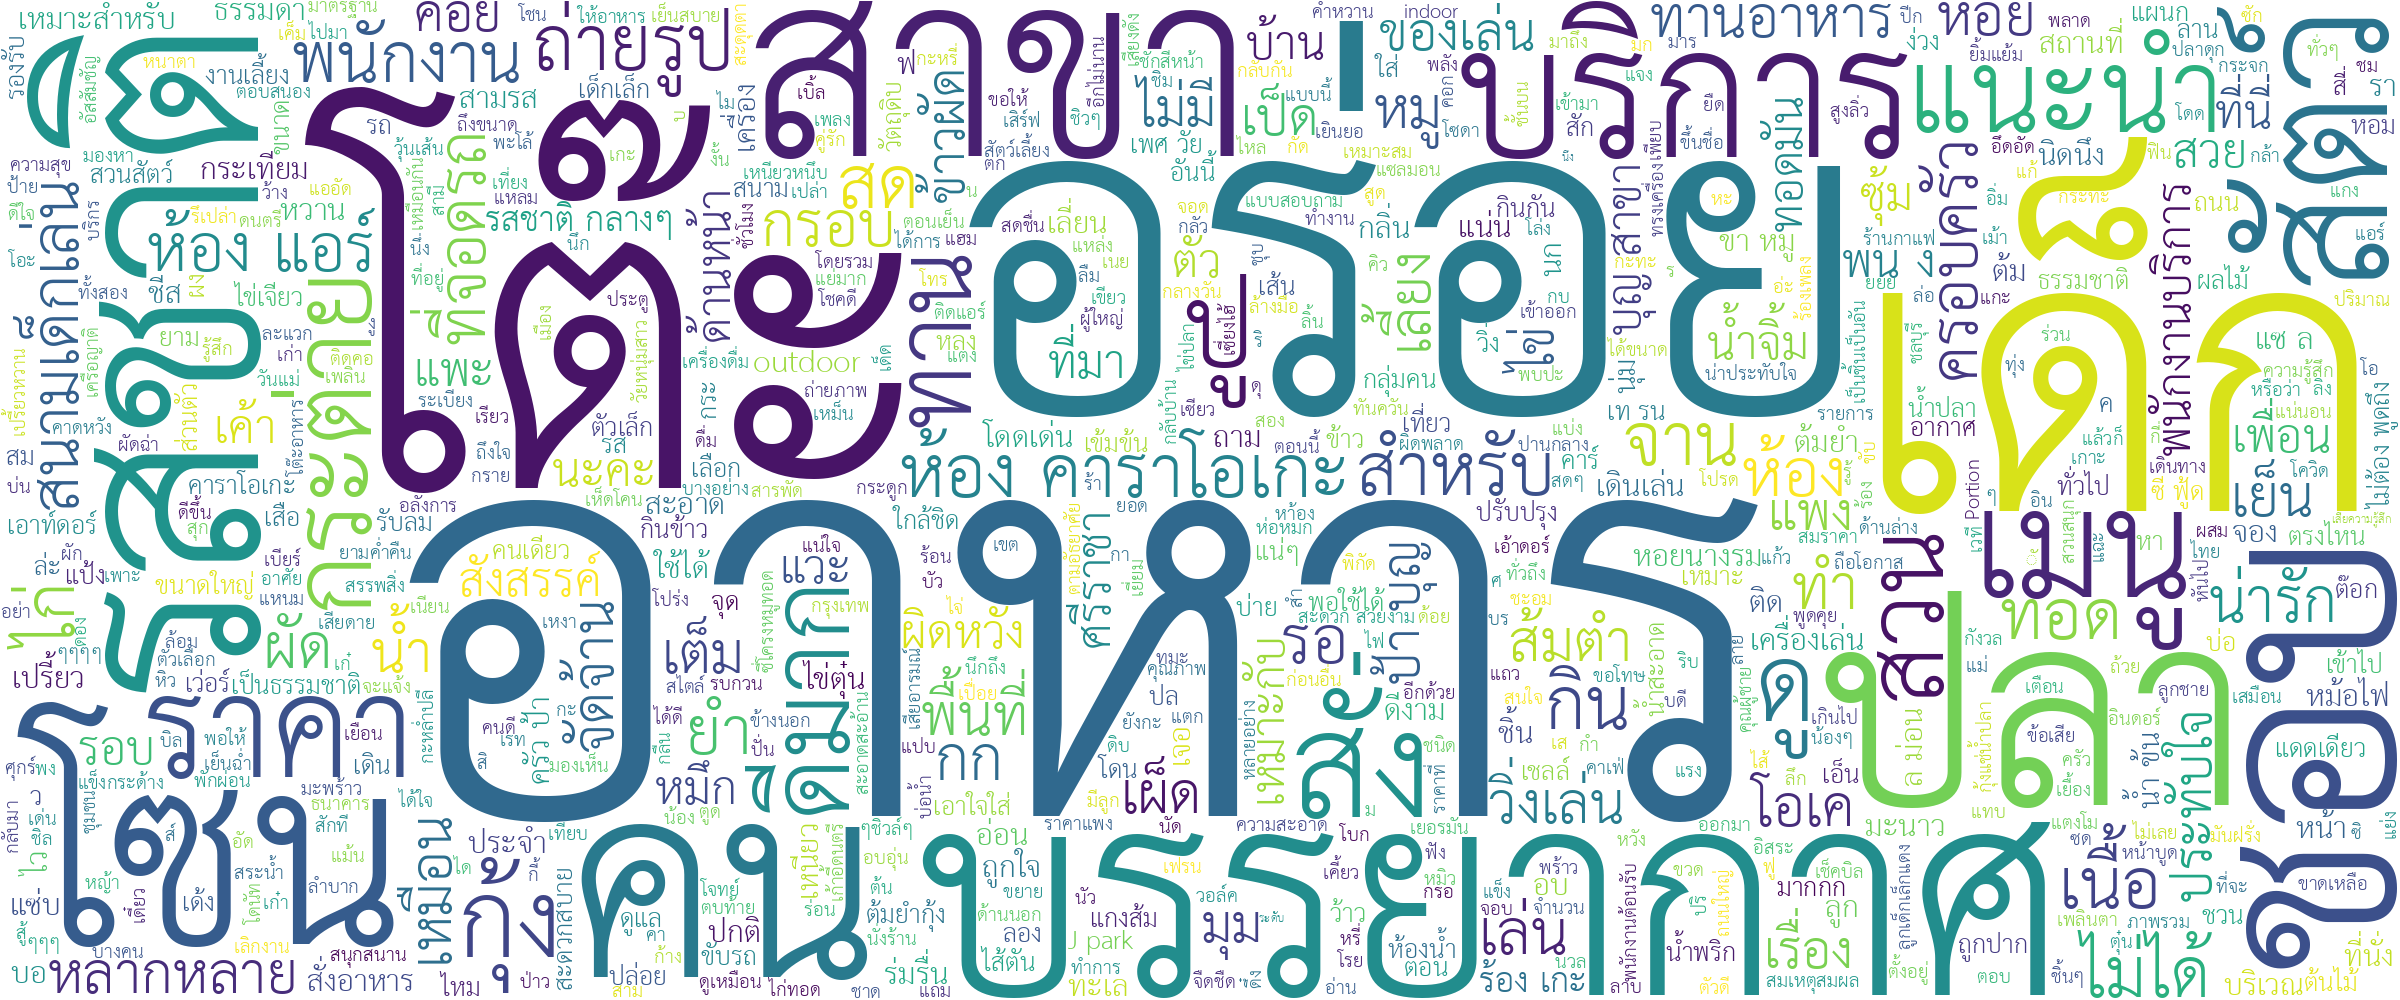

In [45]:
wordcloud.to_image()